In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/insights-into-sleep-patterns-and-daily-habits/sleep_health_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration (hours),Quality of Sleep (scale: 1-10),Physical Activity Level (minutes/day),Stress Level (scale: 1-10),BMI Category,Blood Pressure (systolic/diastolic),Heart Rate (bpm),Daily Steps,Sleep Disorder
0,1,Male,29,Manual Labor,7.4,7.0,41,7,Obese,124/70,91,8539,NaN
1,2,Female,43,Retired,4.2,4.9,41,5,Obese,131/86,81,18754,NaN
2,3,Male,44,Retired,6.1,6.0,107,4,Underweight,122/70,81,2857,NaN
3,4,Male,29,Office Worker,8.3,10.0,20,10,Obese,124/72,55,6886,NaN
4,5,Male,67,Retired,9.1,9.5,19,4,Overweight,133/78,97,14945,Insomnia


In [3]:
df.isnull().sum()

Person ID                                  0
Gender                                     0
Age                                        0
Occupation                                 0
Sleep Duration (hours)                     0
Quality of Sleep (scale: 1-10)             0
Physical Activity Level (minutes/day)      0
Stress Level (scale: 1-10)                 0
BMI Category                               0
Blood Pressure (systolic/diastolic)        0
Heart Rate (bpm)                           0
Daily Steps                                0
Sleep Disorder                           290
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Person ID                              400 non-null    int64  
 1   Gender                                 400 non-null    object 
 2   Age                                    400 non-null    int64  
 3   Occupation                             400 non-null    object 
 4   Sleep Duration (hours)                 400 non-null    float64
 5   Quality of Sleep (scale: 1-10)         400 non-null    float64
 6   Physical Activity Level (minutes/day)  400 non-null    int64  
 7   Stress Level (scale: 1-10)             400 non-null    int64  
 8   BMI Category                           400 non-null    object 
 9   Blood Pressure (systolic/diastolic)    400 non-null    object 
 10  Heart Rate (bpm)                       400 non-null    int64  
 11  Daily 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a visual style
sns.set_theme(style="whitegrid")

# Distribution plots for numeric variables
numeric_cols = [
    "Sleep Duration (hours)",
    "Quality of Sleep (scale: 1-10)",
    "Physical Activity Level (minutes/day)",
    "Stress Level (scale: 1-10)",
    "Heart Rate (bpm)",
    "Daily Steps",
]

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

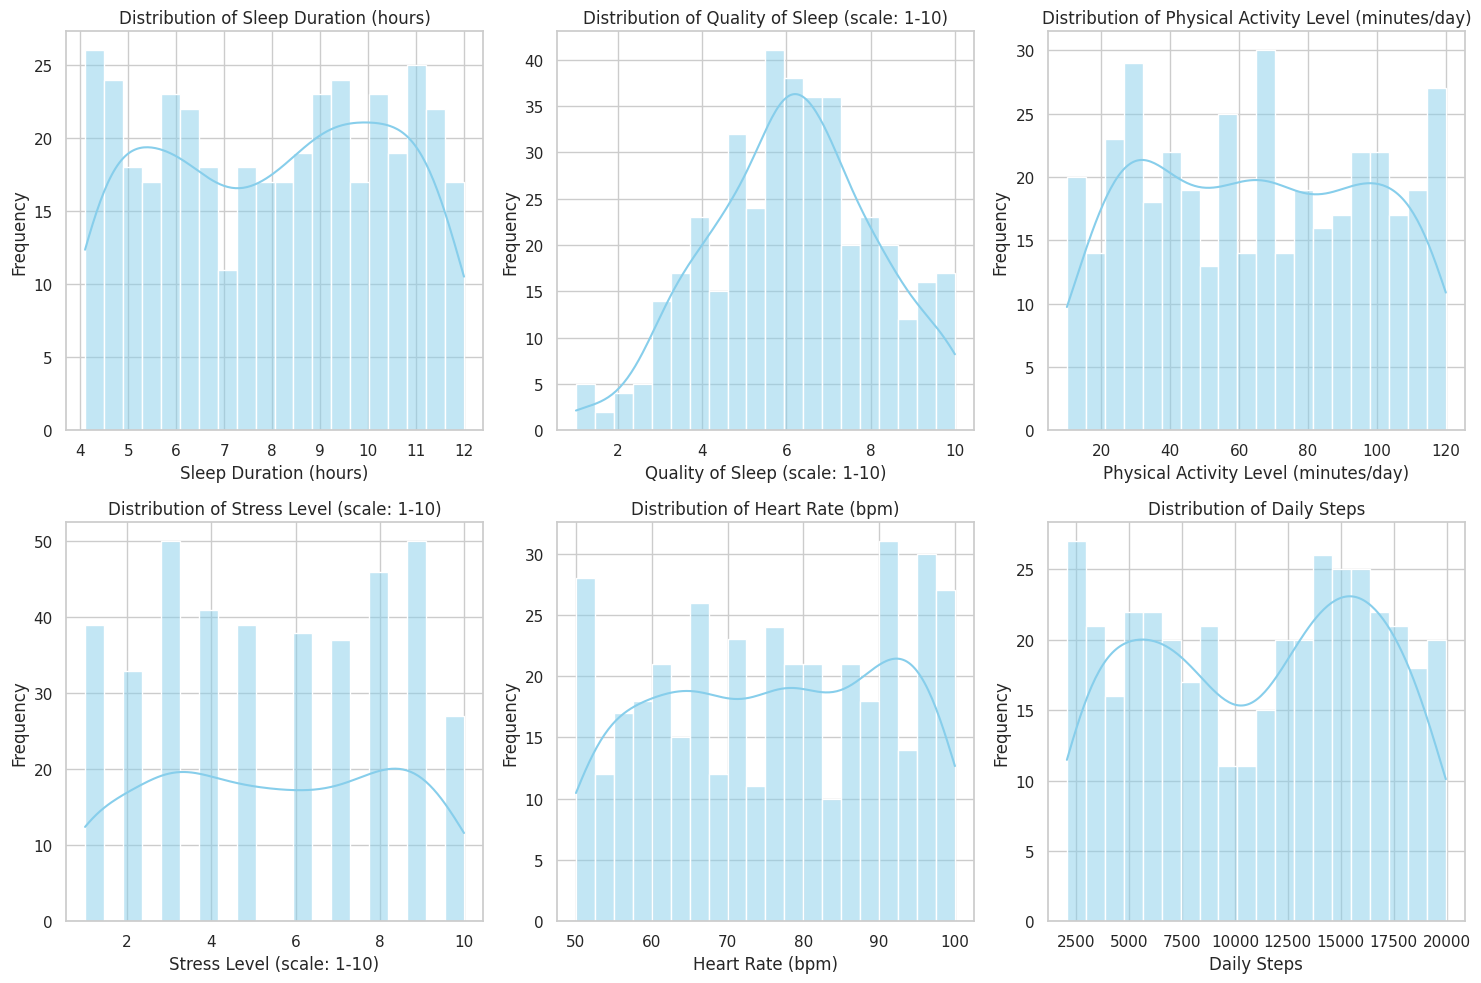

In [6]:
# Create distribution plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

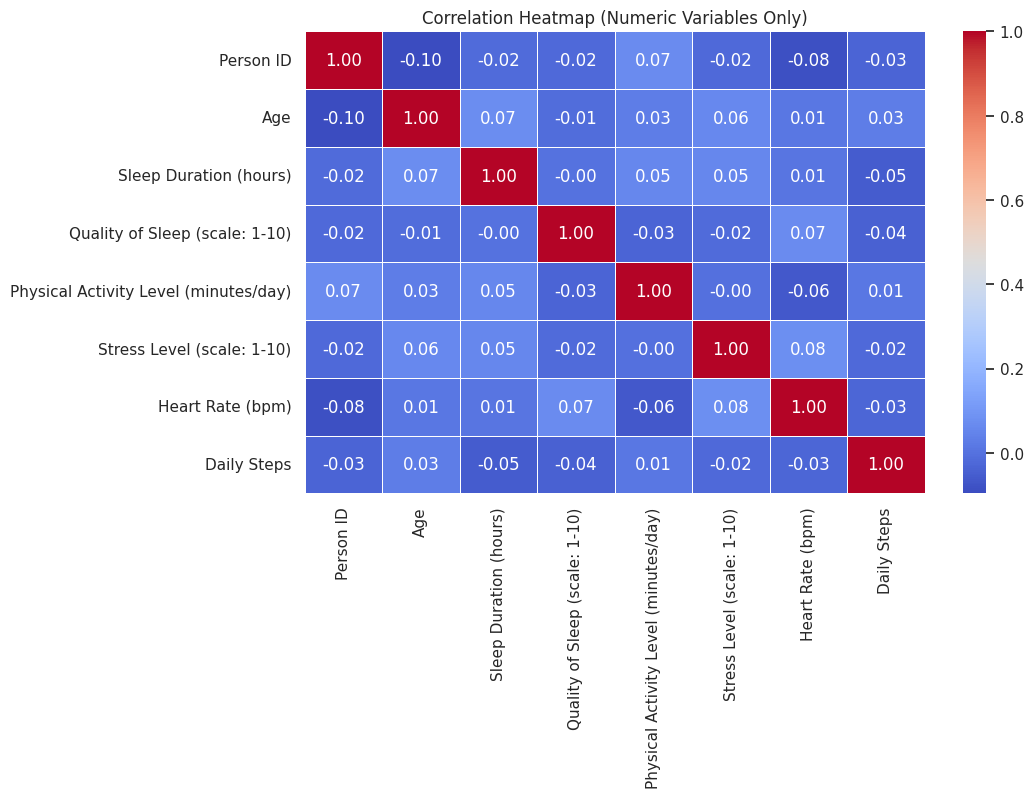

In [7]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=["int64", "float64"])

# Recompute and plot the correlation heatmap
plt.figure(figsize=(10, 6))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

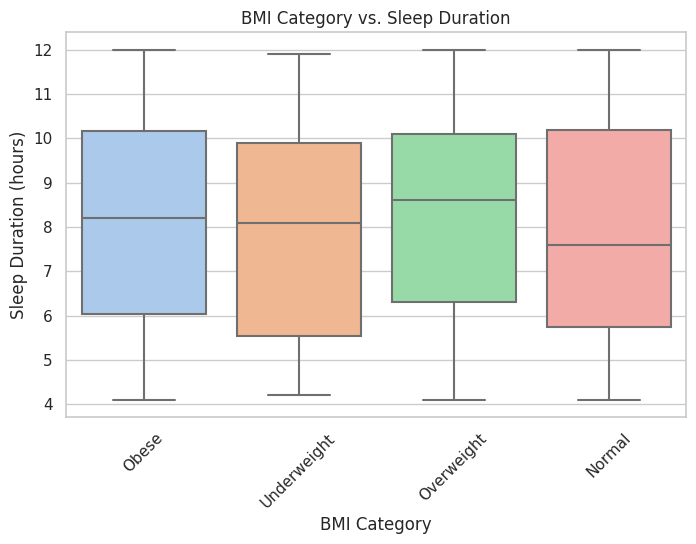

In [8]:
# Categorical analysis: BMI Category vs. Sleep Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x="BMI Category", y="Sleep Duration (hours)", data=df, palette="pastel")
plt.title("BMI Category vs. Sleep Duration")
plt.xlabel("BMI Category")
plt.ylabel("Sleep Duration (hours)")
plt.xticks(rotation=45)
plt.show()

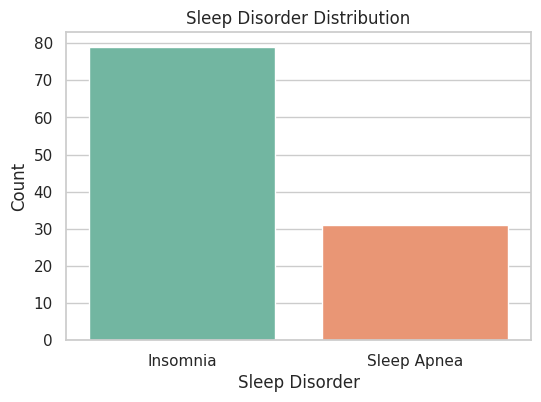

In [9]:
# Categorical analysis: Sleep Disorder distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Sleep Disorder", data=df, palette="Set2")
plt.title("Sleep Disorder Distribution")
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.show()

In [10]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure (systolic/diastolic)'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure (systolic/diastolic)'], inplace=True)  # Drop original column

# Predictions

In [11]:
data_encoded = df.copy()

In [12]:
# Encode categorical variables
categorical_cols = ["Gender", "Occupation", "BMI Category", "Sleep Disorder"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

In [13]:
# Separate features and target for regression (Task 1)
X_reg = data_encoded.drop(columns=["Quality of Sleep (scale: 1-10)", "Sleep Disorder"])
y_reg = data_encoded["Quality of Sleep (scale: 1-10)"]

In [14]:
# Separate features and target for classification (Task 2)
X_clf = data_encoded.drop(columns=["Sleep Disorder", "Quality of Sleep (scale: 1-10)"])
y_clf = data_encoded["Sleep Disorder"]

In [15]:
# Standardize numeric features
scaler = StandardScaler()
X_reg_scaled = scaler.fit_transform(X_reg)
X_clf_scaled = scaler.transform(X_clf)

In [16]:
# Train-test split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf_scaled, y_clf, test_size=0.2, random_state=42)

In [17]:
# Initialize models for regression
reg_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "XGBoost Regressor": xgb.XGBRegressor(random_state=42)
}

In [18]:
# Initialize models for classification
clf_models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Gradient Boosting Classifier": GradientBoostingClassifier(random_state=42),
    "XGBoost Classifier": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
}

In [19]:
# Train and evaluate classification models
clf_results = {}
for name, model in clf_models.items():
    model.fit(X_clf_train, y_clf_train)
    y_pred = model.predict(X_clf_test)
    accuracy = accuracy_score(y_clf_test, y_pred)
    clf_results[name] = {"Accuracy": accuracy}

clf_results

{'Logistic Regression': {'Accuracy': 0.7375},
 'Random Forest Classifier': {'Accuracy': 0.7375},
 'Gradient Boosting Classifier': {'Accuracy': 0.675},
 'XGBoost Classifier': {'Accuracy': 0.675}}

In [20]:
# Train and evaluate regression models
reg_results = {}
for name, model in reg_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred_reg = model.predict(X_reg_test)
    mae = mean_absolute_error(y_reg_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_reg_test, y_pred))
    reg_results[name] = {"MAE": mae, "RMSE": rmse}

reg_results

{'Linear Regression': {'MAE': 4.125, 'RMSE': 4.605784406591346},
 'Random Forest Regressor': {'MAE': 4.125, 'RMSE': 4.605784406591346},
 'Gradient Boosting Regressor': {'MAE': 4.125, 'RMSE': 4.605784406591346},
 'XGBoost Regressor': {'MAE': 4.125, 'RMSE': 4.605784406591346}}

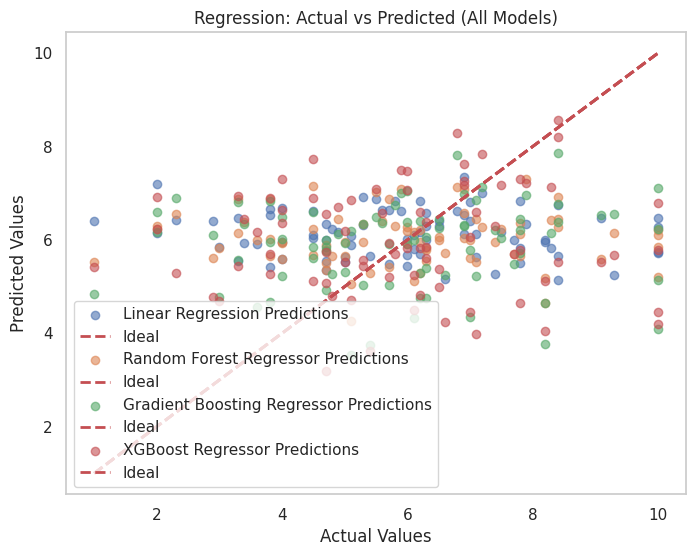

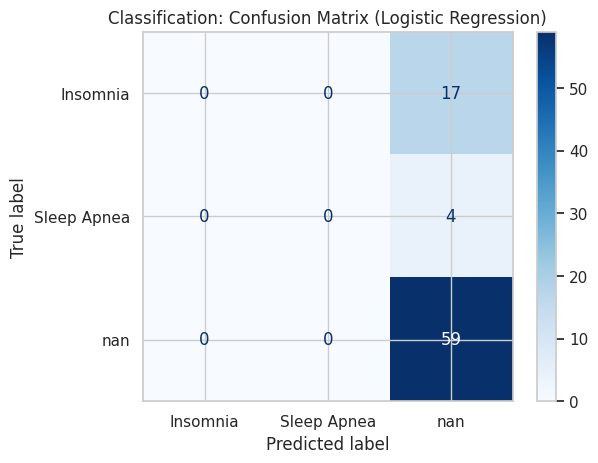

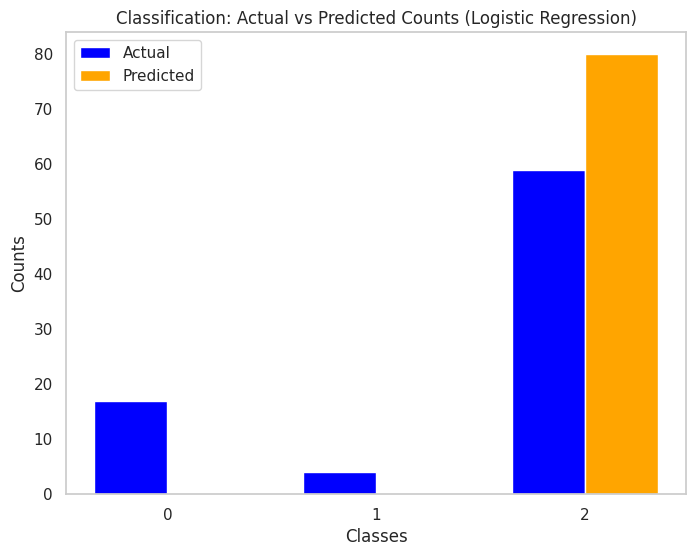

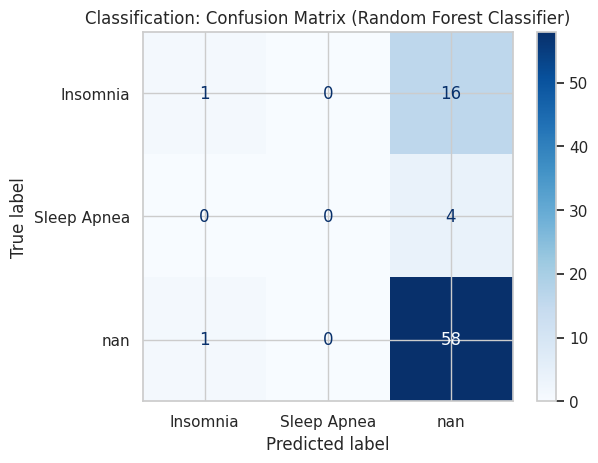

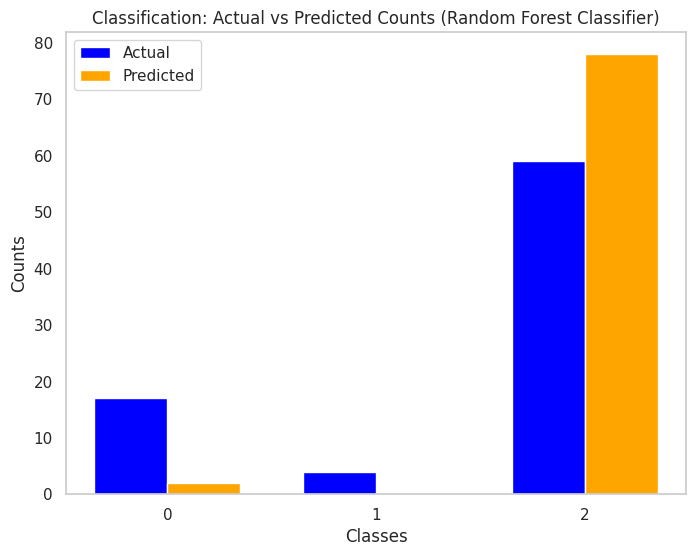

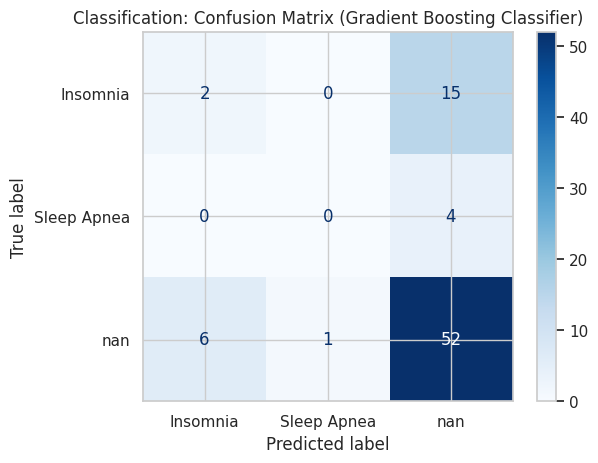

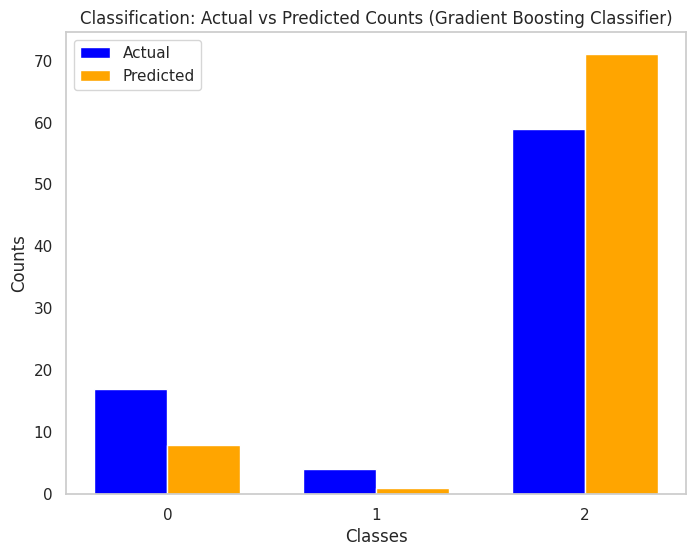

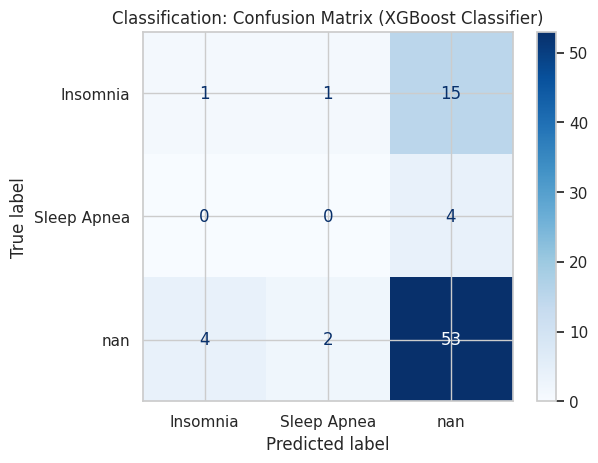

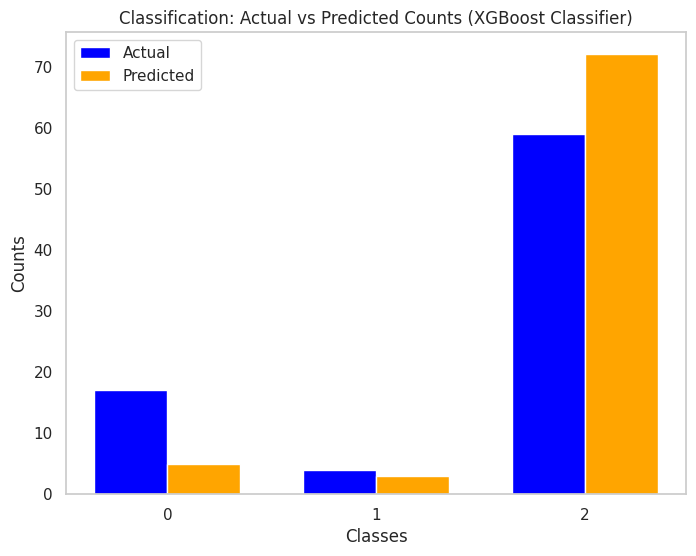

In [21]:
# For regression: Prediction vs Actual Graph for all models
plt.figure(figsize=(8, 6))
for model_name, model in reg_models.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred_reg = model.predict(X_reg_test)
    plt.scatter(y_reg_test, y_pred_reg, alpha=0.6, label=f"{model_name} Predictions")
    plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', lw=2, label="Ideal")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression: Actual vs Predicted (All Models)")
plt.legend()
plt.grid()
plt.show()

# For classification: Confusion Matrix for all models
for model_name, model in clf_models.items():
    model.fit(X_clf_train, y_clf_train)
    y_pred_clf = model.predict(X_clf_test)
    
    cm = confusion_matrix(y_clf_test, y_pred_clf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders["Sleep Disorder"].classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Classification: Confusion Matrix ({model_name})")
    plt.show()

    # For classification: Bar Plot for Actual vs Predicted Counts
    unique_labels = np.unique(y_clf_test)
    actual_counts = [np.sum(y_clf_test == label) for label in unique_labels]
    predicted_counts = [np.sum(y_pred_clf == label) for label in unique_labels]

    bar_width = 0.35
    x = np.arange(len(unique_labels))

    plt.figure(figsize=(8, 6))
    plt.bar(x - bar_width/2, actual_counts, bar_width, label="Actual", color='blue')
    plt.bar(x + bar_width/2, predicted_counts, bar_width, label="Predicted", color='orange')
    plt.xlabel("Classes")
    plt.ylabel("Counts")
    plt.title(f"Classification: Actual vs Predicted Counts ({model_name})")
    plt.xticks(x, unique_labels)
    plt.legend()
    plt.grid()
    plt.show()
